# Word2Vec Model

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
source = urlopen("https://www.egitimsistem.com/da-vincinin-sifresi-kitabinin-ozeti-14314h.htm#:~:text=Da%20Vinci'nin%20%C5%9Eifresi%20Kitap,esrarengiz%20bir%20cinayete%20kurban%20gitmi%C5%9Ftir.&text=Kap%C4%B1%20%C3%A7ald%C4%B1%20ve%20Te%C4%9Fmen%20Collet,kendisinin%20onunla%20birlikte%20gelmesini%20istedi.").read()
soup = BeautifulSoup(source, "lxml")
print(set([text.parent.name for text in soup.find_all(text=True)]))

{'section', 'html', 'aside', 'nav', 'h3', 'head', 'strong', 'time', 'ol', 'form', 'h1', 'b', 'div', 'style', 'h2', 'article', 'center', 'ul', 'a', 'script', 'span', 'header', 'li', 'body', 'footer', 'u', '[document]', 'title'}


In [3]:
text = ""

for paragraph in soup.find_all("span"):
    text += paragraph.text
    
for paragraph in soup.find_all("p"):
    text += paragraph.text
    
print(text)

8 °C2402:0000:0023:0022:0021:0020:0019:0018:0017:3017:0011 Şubat 2016Da Vinci’nin Şifresi Kitap Özeti:Paris Louvre Müzesi müdürü Jarques Sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. Aslında o gece Harwardlı simgebilim profesörü Robert Longdan ile buluşacaktı. Profesor Longdon iş gezisi için Paristeydi ve Jorques Souniere ile de görüşmek istiyordu. Kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. Profesör Longdan aynı gece Hotel Ritz Parisin bir odasında kalıyordu. Fakat gece yarısı respsiyondan gelen telefonla uyandı.Da Vinci’nin Şifresi Kitap Özeti:Paris Louvre Müzesi müdürü Jarques Sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. Aslında o gece Harwardlı simgebilim profesörü Robert Longdan ile buluşacaktı. Profesor Longdon iş gezisi için Paristeydi ve Jorques Souniere ile de görüşmek istiyordu. Kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. Profesör Longdan aynı gece Hotel Ritz Parisin bir odasında kalı

In [4]:
def corpus_lower(corpus):
    corpus = corpus.lower()
    return corpus

text = corpus_lower(text)
print(text)

8 °c2402:0000:0023:0022:0021:0020:0019:0018:0017:3017:0011 şubat 2016da vinci’nin şifresi kitap özeti:paris louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı. profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu. kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu. fakat gece yarısı respsiyondan gelen telefonla uyandı.da vinci’nin şifresi kitap özeti:paris louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir. aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı. profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu. kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı. profesör longdan aynı gece hotel ritz parisin bir odasında kalı

In [5]:
import string

In [6]:
def remove_punctuation(text):
    no_punc = [words for words in text if words not in string.punctuation]
    word_wo_punc = "".join(no_punc)
    return word_wo_punc

text = remove_punctuation(text)
print(text)

8 °c24020000002300220021002000190018001730170011 şubat 2016da vinci’nin şifresi kitap özetiparis louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu fakat gece yarısı respsiyondan gelen telefonla uyandıda vinci’nin şifresi kitap özetiparis louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu fakat gece yarıs

In [7]:
def remove_numeric(corpus):
    output = ''.join(words for words in corpus if not words.isdigit())
    return output

text = remove_numeric(text)
text = text.replace("°c","")
print(text)

  şubat da vinci’nin şifresi kitap özetiparis louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu fakat gece yarısı respsiyondan gelen telefonla uyandıda vinci’nin şifresi kitap özetiparis louvre müzesi müdürü jarques sauniere bir gece müzede esrarengiz bir cinayete kurban gitmiştir aslında o gece harwardlı simgebilim profesörü robert longdan ile buluşacaktı profesor longdon iş gezisi için paristeydi ve jorques souniere ile de görüşmek istiyordu kendisinden randevu talep etmiş fakat herhangi bir cevap alamamıştı profesör longdan aynı gece hotel ritz parisin bir odasında kalıyordu fakat gece yarısı respsiyondan gelen telefonla uyandıresoepsiyon gö

In [8]:
text = text.split()
text

['şubat',
 'da',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özetiparis',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'bir',
 'gece',
 'müzede',
 'esrarengiz',
 'bir',
 'cinayete',
 'kurban',
 'gitmiştir',
 'aslında',
 'o',
 'gece',
 'harwardlı',
 'simgebilim',
 'profesörü',
 'robert',
 'longdan',
 'ile',
 'buluşacaktı',
 'profesor',
 'longdon',
 'iş',
 'gezisi',
 'için',
 'paristeydi',
 've',
 'jorques',
 'souniere',
 'ile',
 'de',
 'görüşmek',
 'istiyordu',
 'kendisinden',
 'randevu',
 'talep',
 'etmiş',
 'fakat',
 'herhangi',
 'bir',
 'cevap',
 'alamamıştı',
 'profesör',
 'longdan',
 'aynı',
 'gece',
 'hotel',
 'ritz',
 'parisin',
 'bir',
 'odasında',
 'kalıyordu',
 'fakat',
 'gece',
 'yarısı',
 'respsiyondan',
 'gelen',
 'telefonla',
 'uyandıda',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özetiparis',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'bir',
 'gece',
 'müzede',
 'esrarengiz',
 'bir',
 'cinayete',
 'kurban',
 'gitmiştir',
 'aslında',
 'o',
 'gece',
 'har

In [9]:
source = urlopen("https://github.com/stopwords-iso/stopwords-tr/blob/master/stopwords-tr.txt").read()
soup = BeautifulSoup(source, "lxml")
print(set([text.parent.name for text in soup.find_all(text=True)]))

{'html', 'nav', 'h3', 'summary', 'include-fragment', 'td', 'main', 'head', 'strong', 'form', 'details-menu', 'h1', 'details-dialog', 'h4', 'div', 'label', 'h2', 'ul', 'tr', 'path', 'table', 'a', 'button', 'template', 'span', 'header', 'li', 'body', 'details', 'relative-time', 'clipboard-copy', '[document]', 'title', 'svg'}


In [10]:
stopwords = ''

for paragraph in soup.find_all("tr"):
    stopwords += paragraph.text
    
stopwords = stopwords.split()
stopwords

['acaba',
 'acep',
 'adamakıllı',
 'adeta',
 'ait',
 'altmýþ',
 'altmış',
 'altý',
 'altı',
 'ama',
 'amma',
 'anca',
 'ancak',
 'arada',
 'artýk',
 'aslında',
 'aynen',
 'ayrıca',
 'az',
 'açıkça',
 'açıkçası',
 'bana',
 'bari',
 'bazen',
 'bazý',
 'bazı',
 'başkası',
 'baţka',
 'belki',
 'ben',
 'benden',
 'beni',
 'benim',
 'beri',
 'beriki',
 'beþ',
 'beş',
 'beţ',
 'bilcümle',
 'bile',
 'bin',
 'binaen',
 'binaenaleyh',
 'bir',
 'biraz',
 'birazdan',
 'birbiri',
 'birden',
 'birdenbire',
 'biri',
 'birice',
 'birileri',
 'birisi',
 'birkaç',
 'birkaçı',
 'birkez',
 'birlikte',
 'birçok',
 'birçoğu',
 'birþey',
 'birþeyi',
 'birşey',
 'birşeyi',
 'birţey',
 'bitevi',
 'biteviye',
 'bittabi',
 'biz',
 'bizatihi',
 'bizce',
 'bizcileyin',
 'bizden',
 'bize',
 'bizi',
 'bizim',
 'bizimki',
 'bizzat',
 'boşuna',
 'bu',
 'buna',
 'bunda',
 'bundan',
 'bunlar',
 'bunları',
 'bunların',
 'bunu',
 'bunun',
 'buracıkta',
 'burada',
 'buradan',
 'burası',
 'böyle',
 'böylece',
 'böylecene',


In [11]:
filtered_text = []

for word in text:
    if word not in stopwords:
        filtered_text.append(word)

filtered_text

['şubat',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özetiparis',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'gece',
 'müzede',
 'esrarengiz',
 'cinayete',
 'kurban',
 'gitmiştir',
 'gece',
 'harwardlı',
 'simgebilim',
 'profesörü',
 'robert',
 'longdan',
 'buluşacaktı',
 'profesor',
 'longdon',
 'gezisi',
 'paristeydi',
 'jorques',
 'souniere',
 'görüşmek',
 'istiyordu',
 'kendisinden',
 'randevu',
 'talep',
 'etmiş',
 'cevap',
 'alamamıştı',
 'profesör',
 'longdan',
 'aynı',
 'gece',
 'hotel',
 'ritz',
 'parisin',
 'odasında',
 'kalıyordu',
 'gece',
 'yarısı',
 'respsiyondan',
 'gelen',
 'telefonla',
 'uyandıda',
 'vinci’nin',
 'şifresi',
 'kitap',
 'özetiparis',
 'louvre',
 'müzesi',
 'müdürü',
 'jarques',
 'sauniere',
 'gece',
 'müzede',
 'esrarengiz',
 'cinayete',
 'kurban',
 'gitmiştir',
 'gece',
 'harwardlı',
 'simgebilim',
 'profesörü',
 'robert',
 'longdan',
 'buluşacaktı',
 'profesor',
 'longdon',
 'gezisi',
 'paristeydi',
 'jorques',
 'souniere',
 'görüşmek',
 'is

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

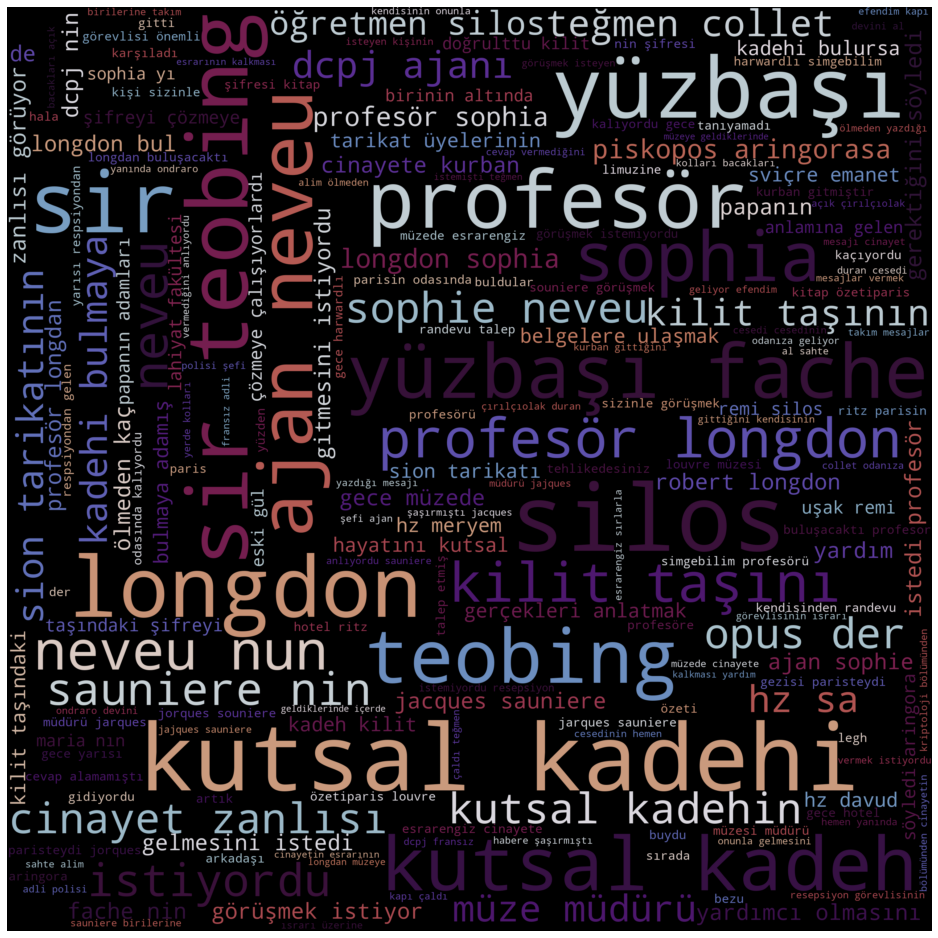

In [13]:
sentence = []

for i in filtered_text:
    sentence.append(i)
    
text_ = " ".join(map(str, sentence)) 

wordcloud = WordCloud(width = 3000, 
                      height = 3000, 
                      max_font_size = 300, 
                      colormap = "twilight_shifted").generate(text_)

plt.figure(figsize = (20,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [14]:
import numpy as np
from PIL import Image

In [15]:
movie_mask = np.array(Image.open("monalisa.jpg"))
movie_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

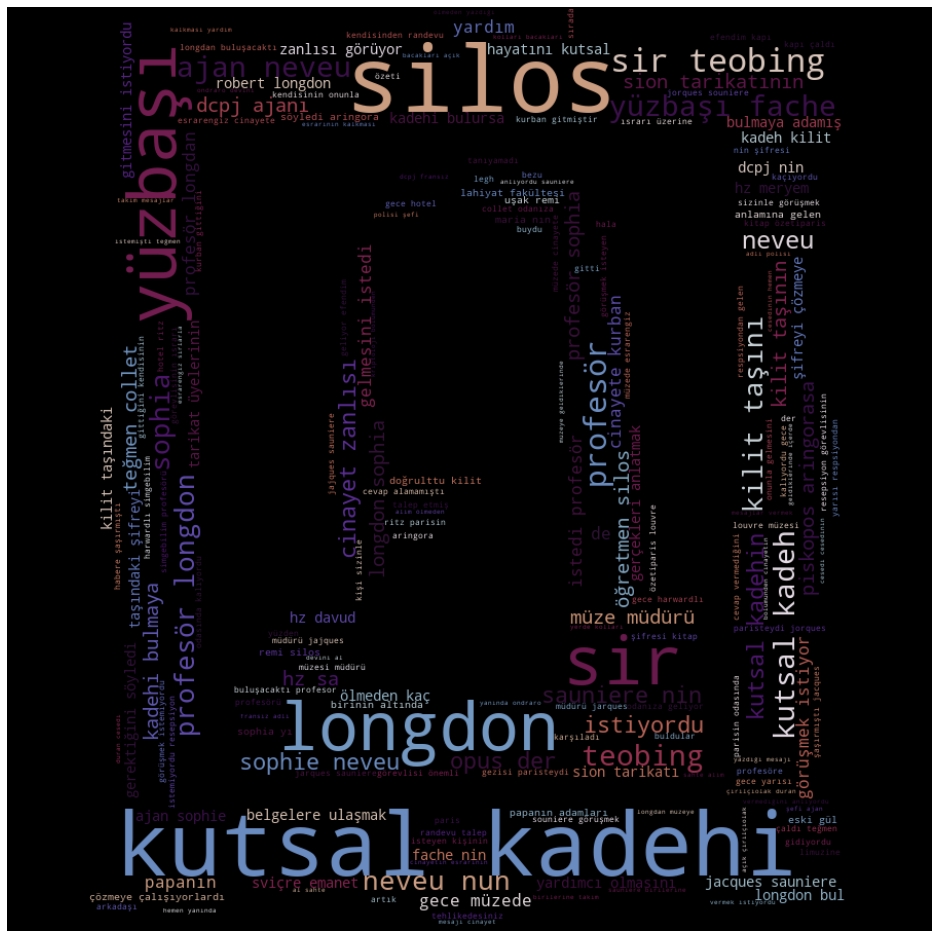

In [16]:
wordcloud = WordCloud(width = 3000, 
                      height = 3000, 
                      max_font_size = 300, 
                      mask = movie_mask, 
                      colormap = "twilight_shifted").generate(text_)

plt.figure(figsize = (20,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [17]:
corpus = []

for cumle in filtered_text:
    corpus.append(cumle.split())
    
corpus

[['şubat'],
 ['vinci’nin'],
 ['şifresi'],
 ['kitap'],
 ['özetiparis'],
 ['louvre'],
 ['müzesi'],
 ['müdürü'],
 ['jarques'],
 ['sauniere'],
 ['gece'],
 ['müzede'],
 ['esrarengiz'],
 ['cinayete'],
 ['kurban'],
 ['gitmiştir'],
 ['gece'],
 ['harwardlı'],
 ['simgebilim'],
 ['profesörü'],
 ['robert'],
 ['longdan'],
 ['buluşacaktı'],
 ['profesor'],
 ['longdon'],
 ['gezisi'],
 ['paristeydi'],
 ['jorques'],
 ['souniere'],
 ['görüşmek'],
 ['istiyordu'],
 ['kendisinden'],
 ['randevu'],
 ['talep'],
 ['etmiş'],
 ['cevap'],
 ['alamamıştı'],
 ['profesör'],
 ['longdan'],
 ['aynı'],
 ['gece'],
 ['hotel'],
 ['ritz'],
 ['parisin'],
 ['odasında'],
 ['kalıyordu'],
 ['gece'],
 ['yarısı'],
 ['respsiyondan'],
 ['gelen'],
 ['telefonla'],
 ['uyandıda'],
 ['vinci’nin'],
 ['şifresi'],
 ['kitap'],
 ['özetiparis'],
 ['louvre'],
 ['müzesi'],
 ['müdürü'],
 ['jarques'],
 ['sauniere'],
 ['gece'],
 ['müzede'],
 ['esrarengiz'],
 ['cinayete'],
 ['kurban'],
 ['gitmiştir'],
 ['gece'],
 ['harwardlı'],
 ['simgebilim'],
 ['pro

In [18]:
from gensim.models import Word2Vec

In [19]:
model = Word2Vec(corpus, size = 150, window = 2, min_count = 2, sg = 1)
model

In [20]:
model.wv["müze"]

array([-2.89226975e-03, -3.17821628e-04, -8.47711810e-04,  2.26534600e-03,
       -2.21823342e-03,  1.14382710e-03, -1.40471000e-03, -1.19942741e-03,
        2.34118057e-03, -2.36171647e-03,  3.05256760e-03,  1.42106984e-03,
       -1.78135152e-03, -2.39106850e-03,  7.75642111e-04,  3.00444337e-03,
       -1.55851303e-03,  9.09220485e-04, -3.21473437e-03, -7.08221487e-05,
       -2.87107890e-03,  1.27199665e-03, -3.03473393e-03,  4.96773690e-04,
       -2.53138854e-03,  1.59891800e-03, -2.65310146e-03,  1.68196124e-03,
        2.35759560e-03,  1.80300919e-03, -1.48773275e-03, -2.80141714e-03,
       -1.42997038e-03, -4.83928190e-04, -1.33722497e-03,  2.31670844e-03,
        1.57669315e-03,  2.51655641e-04,  3.17446934e-03,  9.57550365e-04,
        2.05863244e-03, -2.86504789e-03, -2.19195266e-03,  1.96069758e-03,
        2.30484712e-03,  1.34118338e-04,  1.77247438e-03, -1.94296602e-03,
        2.49018456e-04, -3.22624389e-03, -1.28707470e-04,  2.18397880e-04,
        6.53807831e-04,  

In [21]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [22]:
def tsne_plot(model):
    
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity = 40, n_components = 2, init = "pca", n_iter = 2500, random_state = 23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize = (16,16))
    
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = "offset points",
                     ha = "right",
                     va = "bottom")
    plt.show()

<ipython-input-22-858dfd58c50b>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


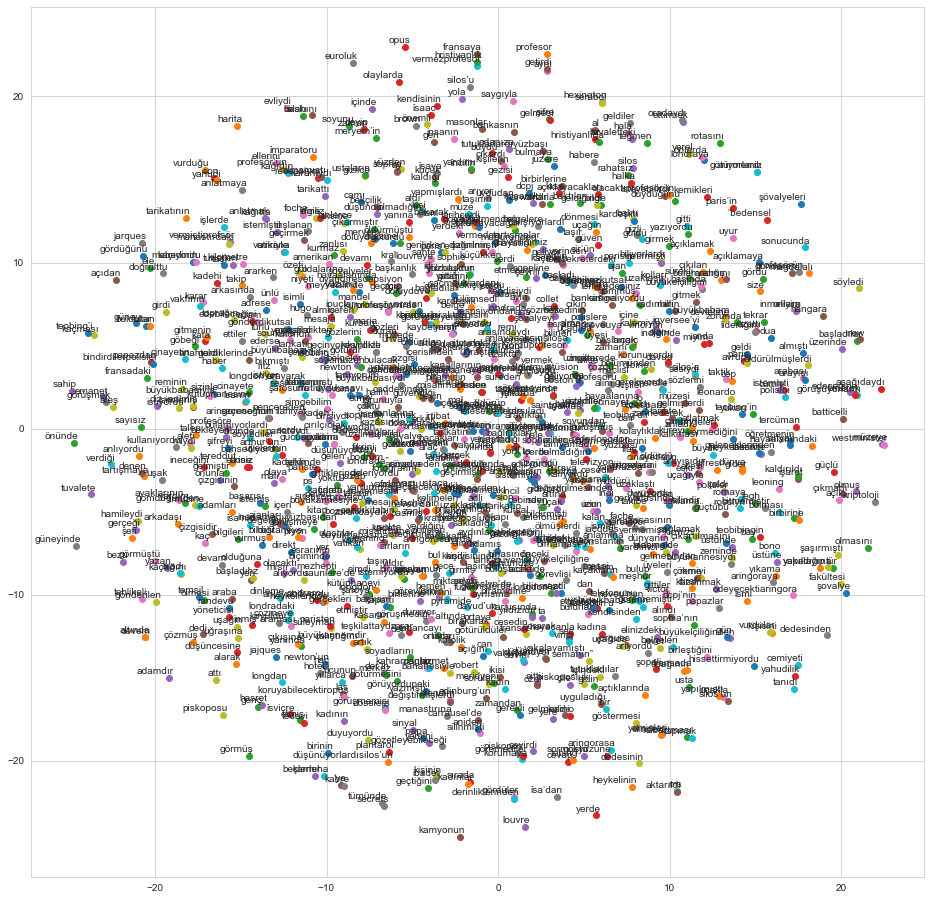

In [23]:
sns.set_style("whitegrid")
tsne_plot(model)

<ipython-input-22-858dfd58c50b>:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


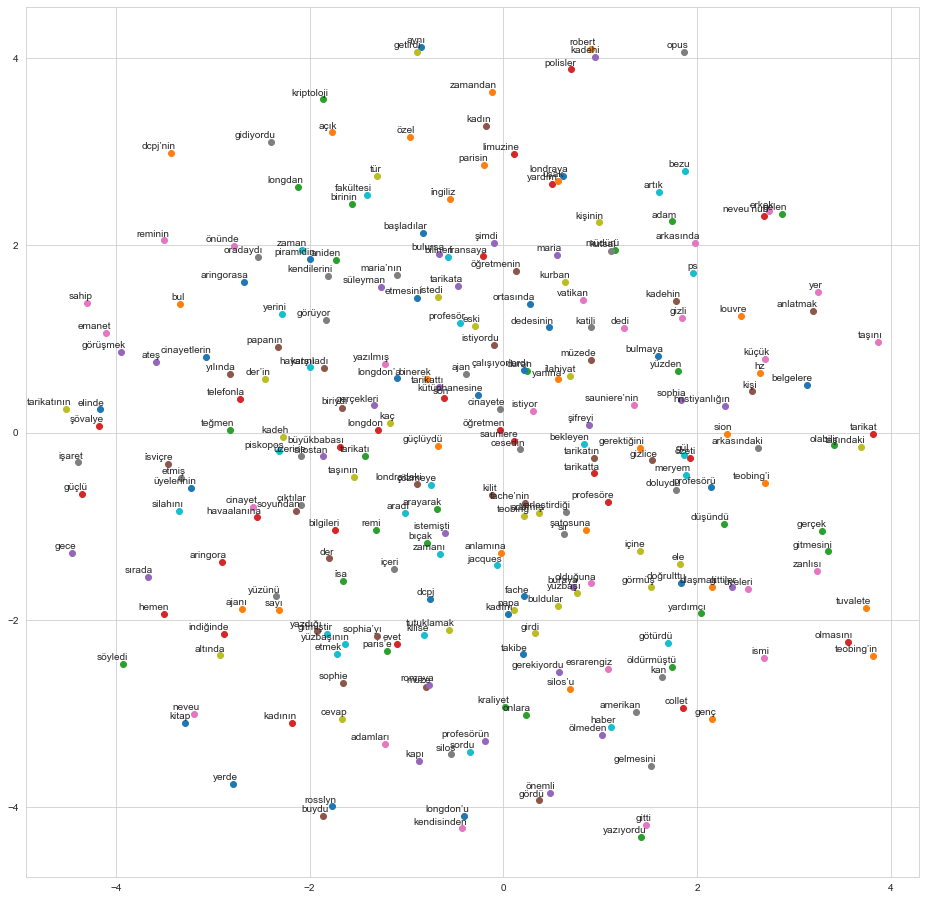

In [24]:
model_ = Word2Vec(corpus, size = 150, window = 2, min_count = 5, sg = 1)
tsne_plot(model_)

In [25]:
model.wv.most_similar("dünya")

[('gider', 0.2341373860836029),
 ('geçirmişti', 0.2149968445301056),
 ('i̇ngiliz', 0.21405652165412903),
 ('ondraro', 0.20794184505939484),
 ('kadınların', 0.2043238878250122),
 ('kutunun', 0.2002616822719574),
 ('teğmen', 0.19925223290920258),
 ('karşısında', 0.1930255889892578),
 ('rotasını', 0.19047363102436066),
 ('teşkilattaydı', 0.1901116669178009)]

In [26]:
model.wv.most_similar("ajan")

[('binerek', 0.24355602264404297),
 ('parisin', 0.22921818494796753),
 ('bulabilirizkutsal', 0.22725528478622437),
 ('telesekreterdeki', 0.22516679763793945),
 ('çalışıyorlardı', 0.22501659393310547),
 ('gerçeği', 0.21571820974349976),
 ('kolları', 0.21288064122200012),
 ('duyuyordu', 0.20627489686012268),
 ('kaç', 0.19946768879890442),
 ('duran', 0.19765634834766388)]

In [27]:
model.wv.most_similar("kutsal")

[('yoktutarikatın', 0.25961440801620483),
 ('müdürü', 0.25463977456092834),
 ('vatikan', 0.22717472910881042),
 ('derinliklerinden', 0.21277675032615662),
 ('büyükbabasının', 0.1947268545627594),
 ('kaçakların', 0.19111955165863037),
 ('bitmemiştir', 0.18520432710647583),
 ('telefonunu', 0.1775602549314499),
 ('ms', 0.17656570672988892),
 ('kilise', 0.17582112550735474)]

In [28]:
model.wv.most_similar("müze")

[('tarihçiydi', 0.2799920439720154),
 ('yapmışlardı', 0.25765660405158997),
 ('belgeler', 0.24304310977458954),
 ('üzülmüşlerdi', 0.2265908420085907),
 ('ayakları', 0.21222738921642303),
 ('tartışmaya', 0.21031086146831512),
 ('arıyorlardı', 0.20966872572898865),
 ('bağları', 0.2073664367198944),
 ('romaya', 0.20412038266658783),
 ('yolculuktur', 0.19638554751873016)]

In [29]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")
model

In [30]:
def closestwords_tsneplot(model, word):
    
    word_vectors = np.empty((0,150))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis = 0)
    
    for w, _ in close_words:           
        word_labels.append(w) 
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis = 0)
    
    tsne = TSNE(random_state = 0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:,0]
    y_coords = Y[:,1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x,y), xytext = (5,-2), textcoords = "offset points") 
        
    plt.show()

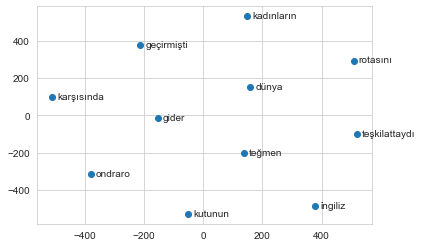

In [31]:
closestwords_tsneplot(model, "dünya")

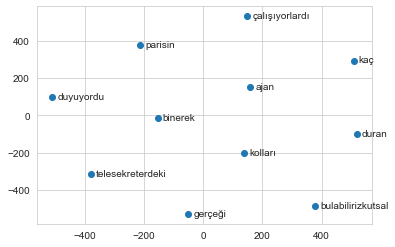

In [32]:
closestwords_tsneplot(model, "ajan")

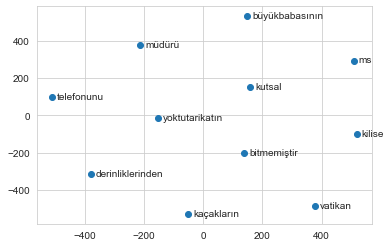

In [33]:
closestwords_tsneplot(model, "kutsal")

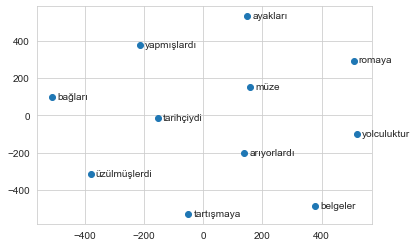

In [34]:
closestwords_tsneplot(model, "müze")